# Assignment 3: ID3 Classifier

**Richard Protasov**


### Overview

> And the burrito is the hallmark of delicous taco shop food: tasty, cheap, and filling [[1]](https://srcole.github.io/100burritos/)

However, the characteristics of a good burrito is open to discussion [[2]](http://www.seriouseats.com/talk/2010/08/what-makes-a-burrito-the-best-burrito.html). More so, it's no secret that a person sits down to enjoy their meal, but, they take a bite of something less than ideal [[3]](https://www.google.com/search?q=disappointing+burritos) [[4]](https://waronpants.net/article/chipolte-burritos-disappoint-me/). We may not be able to directly affect the burrito market (although this scenario may be a realistic outcome) , yet, can we avoid parts of it? This report makes an attempt at doing just so. The findings of the report are based on several classifiers trained on a [San Diego survey](https://www.kaggle.com/srcole/burritos-in-san-diego) from reviewers on over 200 burritos. From these trained models we aim to gather relative insight as to what makes a burrito, a (wonderful, dazzling, and delicious) burrito!


### About the dataset

The data, for purposes of this paper, is initially gathered from a [Kaggle dataset](https://www.kaggle.com/srcole/burritos-in-san-diego), but, the dataset itself has been built upon previous surveys. Features in the dataset range from the volume of a burrito to the Yelp score of burrito shop. The set overall is fairly incomplete but fortunately localized to several attributes. Few of these attributes are consdiered to be prime categories. Hence, preprocessing of data consists mainly seperating interested features. These features are:

- cost
- increasing level of hunger
- tortilla quality 
- meat quality
- non-meat filling quality
- meat to filling ratio
- uniformity
- wrap integrity
- overall quality

Except for cost, all the features are initially rated on a scale of 0 i.e. 0 is awful to 5 i.e. 5 is wonderful. Another factor to take into account is that these ratings are not integer values, but, included ratings of inbetween whole values i.e. 3.8, 4.2, and etc. When beginning this step of the report I decided to map the actual values to one of the categories of: low, average, and high to provide discrete values to the classifier. Near the end of the project I began having doubts about this direction and include in the conclusion additional last thoughts about this. On a side note, I did not initially plan for each value to be categorized to the same set. The fact that they are does not represent the model is unable to handle non-similar classes for, but, this is more so of a convenience for preprocessing the dataset along with later visuals. The approch to cleaning the dataset, once interested values are selected, is to remove instances which included empty values. Fortunately this resulted in only several records to be removed as the dataset is relivaly small. One field that, although one can is integral to a burritos integrity, is removed is the salsa attribute. As it turns out, there were not enough instances to be left with a relatively large enough set. In hindsight, I may have been able to treat this as simply the burrito not including salsa and to mark the scenario as it's own label for the classifier i.e. `NoSalsa`.

### Experiments

The two classifiers invlolded in the report are the Iterative Dichotomiser 3 (ID3) tree learning algorithm along with a modified k-means clusteirng algorithm (KM). Both algorithms take a different approach to classification. ID3 on one hand views an example as a collection of classes. With a pre-specified target attribute i.e. overall quality of a burrito, the ID3 algorithm will partition a set of examples based on some heuristic and continue this process on subsets of the examples until some final state is reached. The heuristic used can vary and should be seleceted to better model the structure of attributes and their classes. For example, assume that some example set contains an attribute which contains a significant set of classes. Some herusitsic may unfairly place more weight on this attribute leading to non-usefull paritions. For this report, the ID3 algorithm weighted candiatinte pivot attributes on the information gain of the attribute. In addition, ID3 is prone to overfitting a model and should be handled by some means. In this report, I took a simple approach which consisted of passing the maximum depth of a tree from the root as a threshold. When the threshold is reached, a leaf is created with the most common class of the set. The threshold chosen i.e. six is partially due to deeper trees requiring an intelligent display. When graphed with a deeper tree it becomes difficult to visually understand the branching near the bottom. Similary, KM iterates over observation until an end state is reached. On the other hand, what is calcuated and the final end state differ from ID3's approach.

The experiments ran are fairly straightfoward. The dataset is sampled and split into a training (70% of the dataset) and testing (30% of the dataset) dataset where both models, ID3 and KM, are trained and tested on the same groups. Training wise, we generate two models. One model is the decision tree by the ID3 algorithm. The second model is a set of clusters built by running the KM algorithm. The second stage of the experiment consisits of testing. Testing consists of two outputs. One output is a the `compare.csv` which includes the prediction results of both models on the testing group. Visually it appears as

Algorithm | Actual | Predicted | Correct
--- | --- | --- | ---
id3/km | 1/2/3 | 1/2/3 | true/false

In addition, the `boundary.csv` file which is the result of classifying the product set of all features and their classes on the ID3 model. The file is inteded to be used to visualize the decision boundary, but, I ran into issues where plots seemed to be difficult to visualize. Visually it appears as

Predicted | Cost | Hunger | etc 
--- | --- | --- | ---
1/2/3 | 1/2/3 | 1/2/3 | 1/2/3

### Results

One thing to mention beforehand is that the plots below are dependent on the output of the `testing` stage. By fully executing all the steps it's likely that the plots will be different (which is interesting in a sense to see how it varies) due to the sampling peformed in the `prep` stage, but, by doing so the previous output will be written over and lost.

In the README I include the markdown version of this Notebook as submitted.

The plots below detail the two ideas: the visual of the tree and the results of the algorithm.

Below is a screen shot of the ID3 model. To view the tree for additional models I includ a small Angular app which loads the template of the tree built in the `train` stage. By entering `make server` a small Python server is started to serve the template and is available at [http://localhost:8000/](http://localhost:8000/).

I find several characteristics from the visual interesting. The first of these would be the indecisiveness that goes with scoring burritos that are ranked around the average class. This is noticed from the depth of the tree which results near the center of partitions. For example, starting from the root attribute `meat` we can see that if it's considered to be low or high the branches are relatively short, and, in some cases stops at the next level i.e. a high score of meat and a high score uniformity results in a leaf. In fact, the middle of the tree from the root results in the deepest branch (which can be seen my modifying the threshold). Additional characteristics I find interesting is a person's hunger appears to have the final say along with the cost of the burrito, meat quality tending to always be the first pivot and for the class of examples that are low for the meat attribute the next attrribute is the meat to filling ratio, and the single leaf with a class of low on the right hand of the tree.  

![ID3 decision tree](data/images/tree.png)

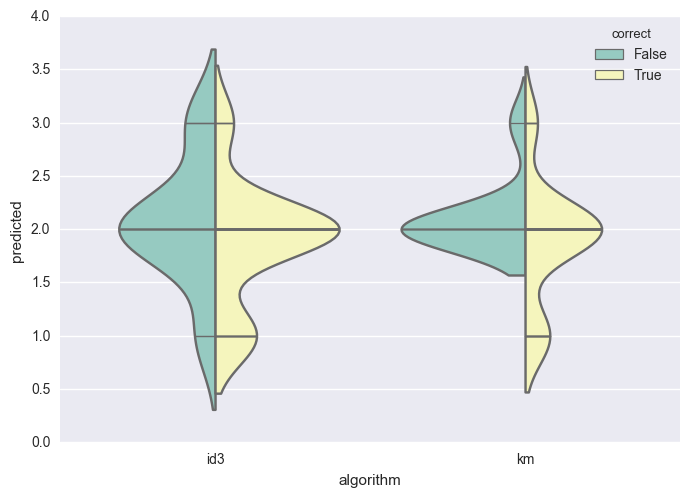

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd

compare = pd.read_csv("data/compare.csv")

sns.violinplot(
    x="algorithm",
    y="predicted",
    hue="correct",
    data=compare,
    split=True,
    inner="stick",
    palette="Set3"
)

sns.plt.show()

The plot below gives a visual of the models' results. Generally KM outpeforms the ID3 algorithm when it comes to testing. In some cases the KM model can correctly predict each example for some class i.e. where overall score is low. One interesting note is both algorithms have similar incorrect and correct predictions for burritos that are classifed as average.

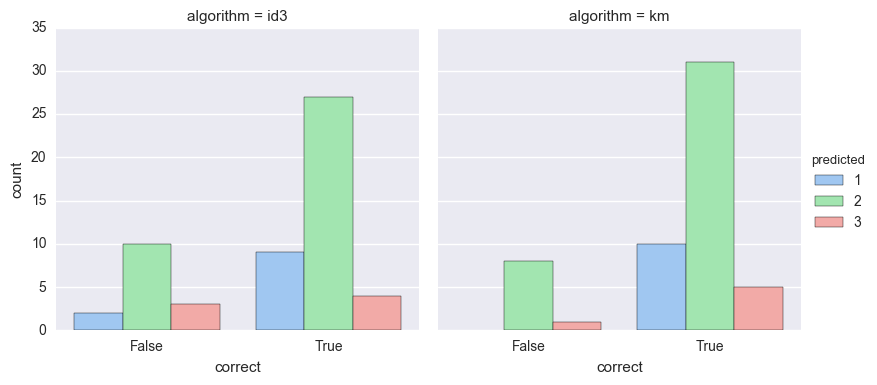

In [2]:
sns.factorplot(
    x="correct",
    data=compare,
    palette="pastel",
    col="algorithm",
    hue="predicted",
    kind="count"
)

sns.plt.show()

The plot below gives us a better idea as to what each model predicted versus the actual category of the burrito. It becomes more evident now as to how similar the predictions are for both models as opposed to the previous plot which weigh higher the differnces in those predicted correct and incorrect.

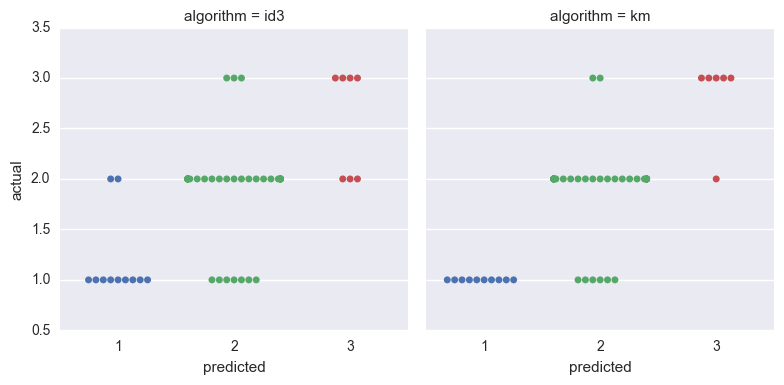

In [3]:
sns.factorplot(
    x="predicted",
    y="actual",
    data=compare,
    palette="deep",
    kind="swarm",
    col="algorithm"
)

sns.plt.show()

### Closing thoughts

Earlier I mentioned that by applying the techniques above we are able to collect relevant information regarding burritos for useful applications. The main use is hinted at for personal use i.e. to provide buritto eaters with better insights to where and what they may enjoy. Additionaly, I added that there may be an additional use that lies with restaurants, cafes, stands, and the like. The models presented here provides a glimpse to the benefits of staticaly backed and digestible insight regarding the preferences of food. Such information allow restaurants to focus on key components of a meal to provide a better expereince for those who eat there.

Future work may focus on attempting new ways to interpret data. For instance, in this report I map all values to one of the categories: low, average, and high. Near the end of the assignment I began to think of the possible information lost out on with how I categorized fields, in addition to, the less than ideal visuals of the results. As opposed to categorizing values pre-training, which is required by the module, there are possible benefits with taking a different path. One such case is allowing examples to consist of "raw" instances i.e. no pre-training categorizing and to associate 'categorizers' to attributes who dynamically subset examples during training. This allows our model to accept continuous data and less information loss i.e. all ratings between zero and three being assigned a label of low.

Lastly, the behavior of the models themselves are of interest. Although the KM classifier tends to outperform ID3 there are some instances where KM achieves terrible accuracy. Occasionally the KM model is unable to learn a center representing one of the target attribute's classes. Hence, testing results in a misclassificaiton of all examples belonging to that class. As KM requires the count of centers, K, to be specififed I found it to be sort of a plug-and-try attempt to find a K which gave reasonable classification results. From my previous guesses of K it seems as if K is too low or K is too high the models results in the previously described scenario (where no centers exist around). It may be interesting to spend more time in a firmer understanding as to why this is the case.